### Example #1-1

Author : Minjun J. Choi (mjchoi@nfri.re.kr)

We will calculate cross power and coherence between two data sets.

#### Step #0
Import modules.

In [59]:
%matplotlib inline 
from fluctana import *

#### Step #1 
Add two data sets to be compared.

One data set has only one channel ('ECEI_G1203').

The other has three channels ('ECEI_G1302', 'ECEI_G1303', 'ECEI_G1304').

In [60]:
A = FluctAna()
A.add_data(KstarEcei(), shot=19348, trange=[8.2, 8.25], clist=['ECEI_G1203'])
A.add_data(KstarEcei(), shot=19348, trange=[8.2, 8.25], clist=['ECEI_G1302-1304'])

data is normalized by trange average
data is normalized by trange average


#### Step #2
Do fft transform with proper option parameters.

In [61]:
A.fftbins(nfft=512,window='hann',overlap=0.5,detrend=1)

---- DATA SET # 0 for [8.2, 8.25] s ----
{000:ECEI_G1203} 
---- DATA SET # 1 for [8.2, 8.25] s ----
{000:ECEI_G1302} {001:ECEI_G1303} {002:ECEI_G1304} 
dnum 0 fftbins 95 with hann size 512 overlap 0.5 detrend 1
dnum 1 fftbins 95 with hann size 512 overlap 0.5 detrend 1


The message means that

data set number 0 has one channel and its data is divided into 95 sections (or bins) with overlap ratio = 0.5. Each section (bin) has 512 data points.

data set number 1 has three channels and each data is divided into 95 sections (or bins) with overlap ratio = 0.5. Each section (bin) has 512 data points.

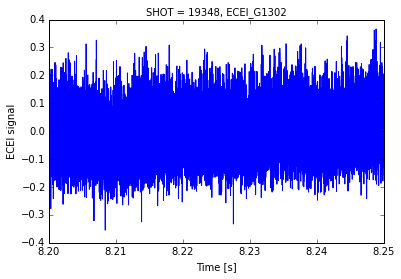

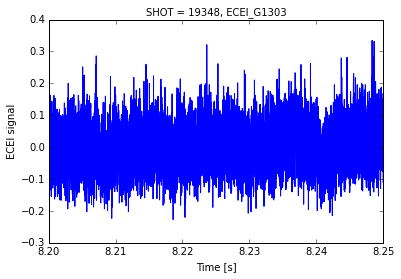

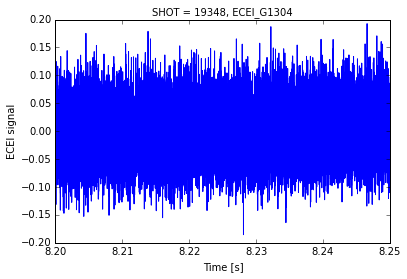

In [62]:
A.mplot(dnum=1,cnum=[0,1,2],type='time')

#### Step #3
Calculate cross power between two data sets.

Set the reference data set (done) as data set number 0. If the reference data set has only one channel, calculations will be done between the one reference channel and all channels in dtwo. Otherwise, done can have same number of channels with dtwo, and calculations between pairs of same channel numbers will be done.

Set dtwo as data set number 1.

In [63]:
A.cross_power(done=0,dtwo=1)

#### Step #4
Plot the calculation result with type='val'. 

The result is saved for data set number 1 (dnum=dtwo=1).

Plot the result of the channel number 0, 1, 2 (in dtwo=1) in multiple windows.

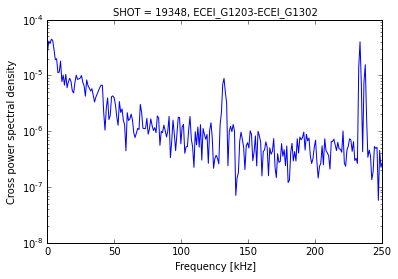

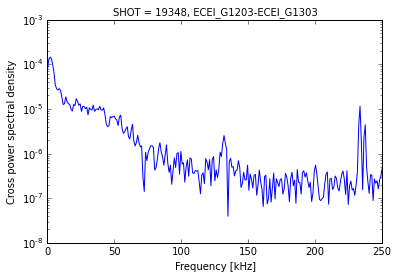

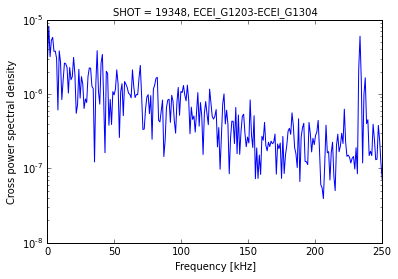

In [64]:
A.mplot(dnum=1,cnum=[0,1,2],type='val')

Plot the result of the channel number 0, 1, 2 (in dtwo=1) in single window (overlapping)

dnum 1 : calculation ECEI_G1203-ECEI_G1302 is plotted
dnum 1 : calculation ECEI_G1203-ECEI_G1303 is plotted
dnum 1 : calculation ECEI_G1203-ECEI_G1304 is plotted


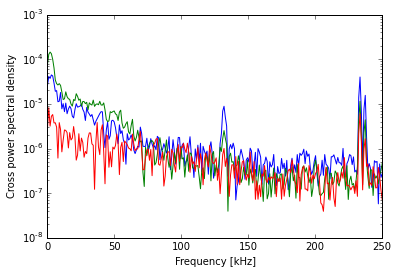

In [65]:
A.oplot(dnum=1,cnum=[0,1,2],type='val')

Plot the rms amplitude image (3 points in this example) by integrating the cross power spectral density over a frequency range

snum : sample channel number

frange : integration frequency range

vlimits : color scale limits

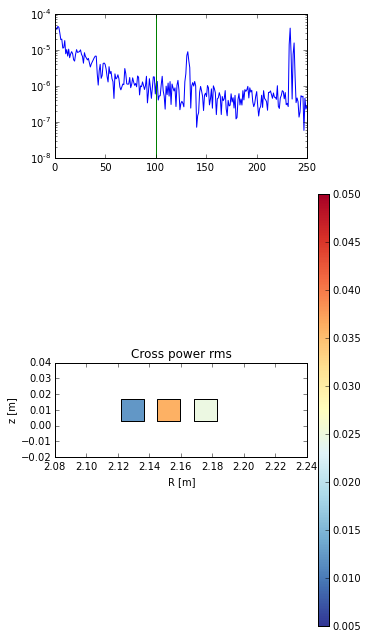

In [66]:
A.cplot(dnum=1,snum=0,frange=[0,100],vlimits=[0.005,0.05])

You can check calculation values as follows.

In [67]:
print A.Dlist[1].pdata # in channel number ordering

[ 0.02483532  0.03626286  0.01234281]


You can calculate and plot coherence similarily.

In [68]:
A.coherence(done=0,dtwo=1)

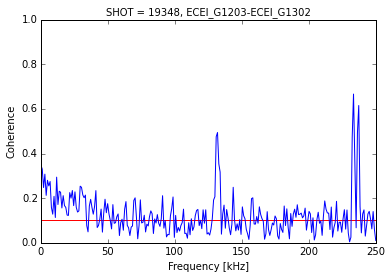

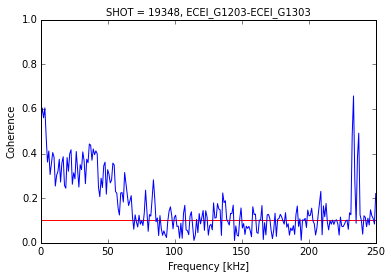

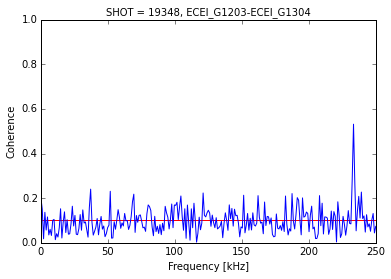

In [69]:
A.mplot(dnum=1,cnum=[0,1,2],type='val',ylimits=[0,1])

dnum 1 : calculation ECEI_G1203-ECEI_G1302 is plotted
dnum 1 : calculation ECEI_G1203-ECEI_G1303 is plotted
dnum 1 : calculation ECEI_G1203-ECEI_G1304 is plotted


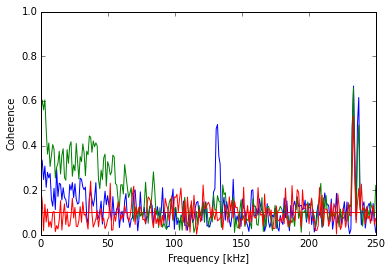

In [70]:
A.oplot(dnum=1,cnum=[0,1,2],type='val',ylimits=[0,1])

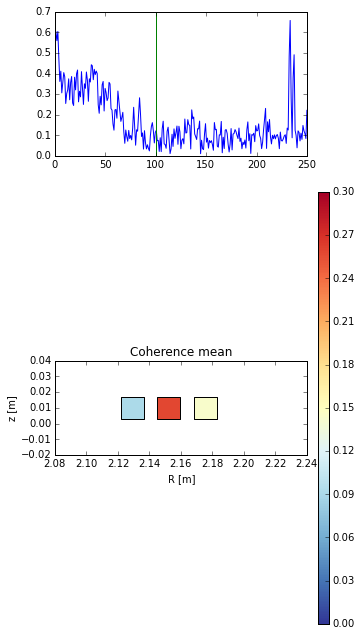

In [71]:
A.cplot(dnum=1,snum=1,frange=[0,100],vlimits=[0,0.3])

In [72]:
print A.Dlist[1].pdata

[ 0.1432167   0.25849752  0.09098149]
